# Project By Vivek

In [1]:
# Initialize Spark session
spark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1667010820174_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Reading the data from the files in HDFS by a specific schema using PySpark

In [2]:
# Loading the csv file from hdfs into spark`
data_spar = spark.read.load("/user/root/etl/part-m-00000", format = "csv", inferSchema = True, header = True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# Preview of load data
data_spar.show(8)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+------+---+--------+---+---------------+-----------+-------------------+---+----+------+------+---+------------------+----+----------+----+----+------+------+-------+--------------+-------+----+---+---+---+-----+---+---+-------+--------------------+
|2017|January| 12|Sunday|  0|  Active| 16|            NCR| NÃƒÂ¦stved|        Farimagsvej|  8|4700|55.233|11.763|DKK|        MasterCard|5643|Withdrawal|_c18|_c19|55.230|11.761|2616038|      Naestved|281.150|1014| 87|  7|260|0.215| 92|500|   Rain|          light rain|
+----+-------+---+------+---+--------+---+---------------+-----------+-------------------+---+----+------+------+---+------------------+----+----------+----+----+------+------+-------+--------------+-------+----+---+---+---+-----+---+---+-------+--------------------+
|2017|January|  1|Sunday|  0|Inactive|  2|            NCR|   Vejgaard|         Hadsundvej| 20|9000|57.043|  9.95|DKK|        MasterCard|1764|Withdrawal|null|null|57.048| 9.935|2616235|NÃƒÂ¸rresund

In [4]:
# Importing Library to create the Schema
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DoubleType, LongType

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
newSchema = StructType([StructField('year', IntegerType(), nullable = False),
                        StructField('month', StringType(), False),
                        StructField('day', IntegerType(), False),
                        StructField('weekday', StringType(), False),
                        StructField('hour', IntegerType(), False),
                        StructField('atm_status', StringType(), False),
                        StructField('atm_id', StringType(), False),
                        StructField('atm_manufacturer', StringType(), False),
                        StructField('atm_location', StringType(), False),
                        StructField('atm_streetname', StringType(), False),
                        StructField('atm_street_number', IntegerType(), False),
                        StructField('atm_zipcode', IntegerType(), False),
                        StructField('atm_lat', DoubleType(), False),
                        StructField('atm_lon', DoubleType(), False),
                        StructField('currency', StringType(), False),
                        StructField('card_type', StringType(), False),
                        StructField('transaction_amount', IntegerType(), False),
                        StructField('service', StringType(), False),
                        StructField('message_code', StringType(), True),
                        StructField('message_text', StringType(), True),
                        StructField('weather_lat', DoubleType(), False),
                        StructField('weather_lon', DoubleType(), False),
                        StructField('weather_city_id', IntegerType(), False),
                        StructField('weather_city_name', StringType(), False),
                        StructField('temp', DoubleType(), False),
                        StructField('pressure', IntegerType(), False),
                        StructField('humidity', IntegerType(), False),
                        StructField('wind_speed', IntegerType(), False),
                        StructField('wind_deg', IntegerType(), False),
                        StructField('rain_3h', DoubleType(), True),
                        StructField('clouds_all', IntegerType(),False),
                        StructField('weather_id', IntegerType(), False),
                        StructField('weather_main', StringType(), False),
                        StructField('weather_description', StringType(), False)])


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
updated_schema_data= spark.read.csv("/user/root/etl/part-m-00000", header = False, schema = newSchema)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
updated_schema_data.show(8)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+-------+----+----------+------+----------------+------------+-------------------+-----------------+-----------+-------+-------+--------+------------------+------------------+----------+------------+------------+-----------+-----------+---------------+-----------------+------+--------+--------+----------+--------+-------+----------+----------+------------+--------------------+
|year|  month|day|weekday|hour|atm_status|atm_id|atm_manufacturer|atm_location|     atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|currency|         card_type|transaction_amount|   service|message_code|message_text|weather_lat|weather_lon|weather_city_id|weather_city_name|  temp|pressure|humidity|wind_speed|wind_deg|rain_3h|clouds_all|weather_id|weather_main| weather_description|
+----+-------+---+-------+----+----------+------+----------------+------------+-------------------+-----------------+-----------+-------+-------+--------+------------------+------------------+----------+---

In [8]:
updated_schema_data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_id: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- currency: string (nullable = true)
 |-- card_type: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name: st

In [9]:
#Checking  count of data after importing data into a dataframe
updated_schema_data.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

# Creating Dimension Table and Fact Table

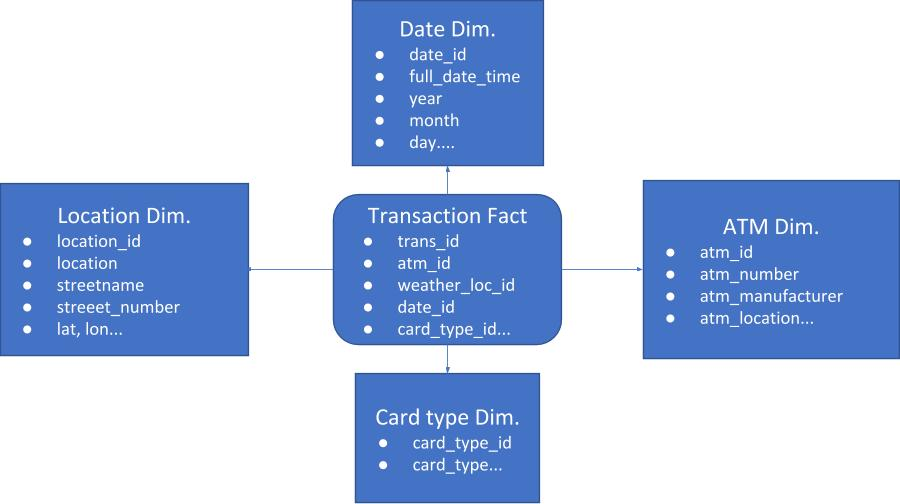

In [10]:
# Importing Library
from pyspark.sql.types import *
from pyspark.sql.window import Window
from pyspark.sql.functions import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Creating Table for Dimension Table Location

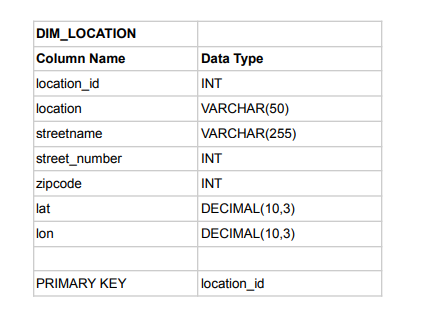

     -- This is a very important dimension containing all the location data including location name, street name, street number, zip code and even the latitude and longitude. This information will be very important for solving problems related to the particular location at which a transaction took place and can help banks in things like pinpointing locations where ATMs where demand is higher as compared to other locations. Combined with weather data in the transaction table, this can be used to further do analysis such as how weather affects the demand at ATMs at a particular location.

In [11]:
location = updated_schema_data.select('atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
location.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-------------------+-----------------+-----------+-------+-------+
|    atm_location|     atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|
+----------------+-------------------+-----------------+-----------+-------+-------+
|         Kolding|           Vejlevej|              135|       6000| 55.505|  9.457|
|  Skelagervej 15|        Skelagervej|               15|       9000| 57.023|  9.891|
|Intern HolbÃƒÂ¦k|        Slotsvolden|                7|       4300| 55.718| 11.704|
|          Odense|       FÃƒÂ¦lledvej|                3|       5000| 55.394|  10.37|
|           Ikast|RÃƒÂ¥dhusstrÃƒÂ¦det|               12|       7430| 56.139|  9.154|
|         Randers|       ÃƒËœstervold|               16|       8900| 56.462| 10.038|
|         Esbjerg|       Strandbygade|               20|       6700| 55.468|   8.44|
|          Lyngby|        Jernbanevej|                6|       2800| 55.772|   12.5|
|           Skive|           Adelgade|                8|       78

# Adding Unique identifier for each Dimension Table and Fact Table Using Window Function

    -- During the creation of Dimension tables, you will have to add a row number/index to each table so that a primary key can be established.

    -- Spark SQL provides a function called row_number() as part of the window functions group, which can be used to assign a sequential integer number to each row in a DataFrame according to the partition decided.


In [13]:
location1=location.select('atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon',row_number().over(Window.partitionBy().orderBy(location['atm_location'])).alias("location_id"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
location1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+-----------------+-----------+-------+-------+-----------+
|        atm_location|    atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|location_id|
+--------------------+------------------+-----------------+-----------+-------+-------+-----------+
|             Aabybro|      ÃƒËœstergade|                6|       9440| 57.162|   9.73|          1|
|      Aalborg Hallen|      Europa Plads|                4|       9000| 57.044|  9.913|          2|
|Aalborg Storcente...|          Hobrovej|              452|       9200| 57.005|  9.876|          3|
|Aalborg Storcente...|          Hobrovej|              452|       9200| 57.005|  9.876|          4|
|         Aalborg Syd|          Hobrovej|              440|       9200| 57.005|  9.881|          5|
|           AalbÃƒÂ¦k|        Centralvej|                5|       9982| 57.593| 10.412|          6|
|              Aarhus|    SÃƒÂ¸nder Alle|               11|       8000| 56.153| 10.206|          7|


In [15]:
# renaming the colums and rearranging as per schema given
DIM_LOCATION =location1.select('location_id','atm_location','atm_streetname','atm_street_number','atm_zipcode','atm_lat','atm_lon')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
DIM_LOCATION.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+--------------------+---------------+-----------------+-----------+-------+-------+
|location_id|        atm_location| atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|
+-----------+--------------------+---------------+-----------------+-----------+-------+-------+
|          1|             Aabybro|   ÃƒËœstergade|                6|       9440| 57.162|   9.73|
|          2|      Aalborg Hallen|   Europa Plads|                4|       9000| 57.044|  9.913|
|          3|Aalborg Storcente...|       Hobrovej|              452|       9200| 57.005|  9.876|
|          4|Aalborg Storcente...|       Hobrovej|              452|       9200| 57.005|  9.876|
|          5|         Aalborg Syd|       Hobrovej|              440|       9200| 57.005|  9.881|
|          6|           AalbÃƒÂ¦k|     Centralvej|                5|       9982| 57.593| 10.412|
|          7|              Aarhus| SÃƒÂ¸nder Alle|               11|       8000| 56.153| 10.206|
|          8|              Aar

In [17]:
#Check count for the Location Dimension
DIM_LOCATION.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

109

### Creating Table for Dimension Table ATM

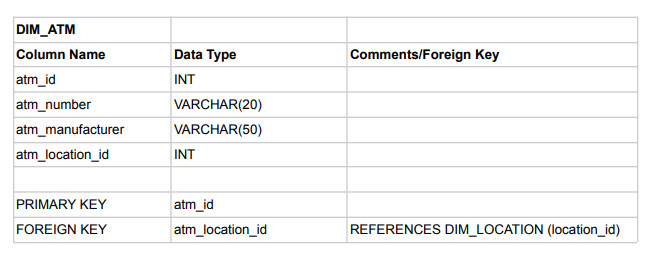

    -- This dimension will have the data related to the various ATMs present in the dataset along with the ATM number(ATM ID in the original dataset), ATM manufacturer and a reference to the ATM location and is very important for solving analytical queries related where ATM data will be used

In [18]:
atm = updated_schema_data.select('atm_id', 'atm_manufacturer', 'atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
atm = atm.join(location1, on = ['atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
# selecting the required columns and making sure records are distinct
atm1 = atm.select('atm_id', 'atm_manufacturer', 'location_id').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
# Changing the name of column accordiing to target Schema
atm1 = atm1.withColumnRenamed('atm_id','atm_number')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
atm2= atm1.select('atm_number', 'atm_manufacturer', 'location_id',row_number().over(Window.partitionBy().orderBy(atm1['atm_manufacturer'])).alias("atm_id"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
DIM_ATM=atm2.select('atm_id','atm_number', 'atm_manufacturer', 'location_id')
DIM_ATM.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+----------------+-----------+
|atm_id|atm_number|atm_manufacturer|location_id|
+------+----------+----------------+-----------+
|     1|       113| Diebold Nixdorf|         89|
|     2|        56| Diebold Nixdorf|         64|
|     3|       110| Diebold Nixdorf|         41|
|     4|        70| Diebold Nixdorf|         42|
|     5|        78| Diebold Nixdorf|         71|
|     6|        85| Diebold Nixdorf|         63|
|     7|         9| Diebold Nixdorf|         31|
|     8|       107| Diebold Nixdorf|         62|
|     9|       105| Diebold Nixdorf|         76|
|    10|        46| Diebold Nixdorf|         33|
|    11|        62| Diebold Nixdorf|        101|
|    12|        41| Diebold Nixdorf|         82|
|    13|         7| Diebold Nixdorf|         38|
|    14|        40| Diebold Nixdorf|         27|
|    15|        23| Diebold Nixdorf|        107|
|    16|        48| Diebold Nixdorf|         18|
|    17|        59| Diebold Nixdorf|         73|
|    18|       111| 

In [26]:
#Check count for the ATM Dimension
DIM_ATM.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

113

### Creating Table for Dimension Table Date

    --This is another very important dimension which is almost always present where data such as transactional data is being dealt with. This dimension includes fields such as the full date and time timestamp, year, month, day, hour as well as the weekday for a transaction. This all can help in analysing the transaction behaviour with respect to the time at which the transaction took place and also how the transaction activity varies between weekdays and weekends.

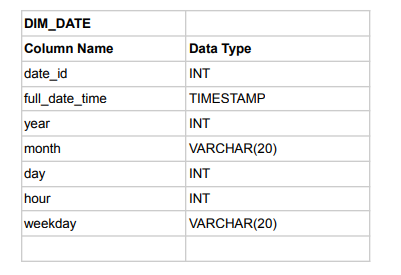

In [28]:
# creating a temporary df and selecting required columns
date = updated_schema_data.select('year', 'month', 'day', 'hour', 'weekday')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
# Creating the new Column Full_time_date for Date Dimension to meet target Schema
date1=date.withColumn('full_date', concat_ws('-', date.year, date.month, date.day)).withColumn('full_time',concat_ws(':',date.hour,lit('00'),lit('00')))
                                                    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
date2=date1.withColumn('full_date_time',concat_ws(' ',date1.full_date,date1.full_time))
date2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+----+-------+--------------+---------+--------------------+
|year|  month|day|hour|weekday|     full_date|full_time|      full_date_time|
+----+-------+---+----+-------+--------------+---------+--------------------+
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-January-1 0:...|
|2017|January|  1|   0| Sunday|2017-January-1|  0:00:00|2017-Jan

In [33]:
pattern = 'yyyy-MMM-dd HH:mm:ss'
date3= date2.withColumn('full_date_time', unix_timestamp(date2.full_date_time, pattern).cast('timestamp')).distinct()
date3.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+--------+---+----+---------+----------------+---------+-------------------+
|year|   month|day|hour|  weekday|       full_date|full_time|     full_date_time|
+----+--------+---+----+---------+----------------+---------+-------------------+
|2017|   March| 16|  20| Thursday|   2017-March-16| 20:00:00|2017-03-16 20:00:00|
|2017|   March| 22|   0|Wednesday|   2017-March-22|  0:00:00|2017-03-22 00:00:00|
|2017|February|  6|  23|   Monday| 2017-February-6| 23:00:00|2017-02-06 23:00:00|
|2017|   March| 18|  14| Saturday|   2017-March-18| 14:00:00|2017-03-18 14:00:00|
|2017|February| 21|  18|  Tuesday|2017-February-21| 18:00:00|2017-02-21 18:00:00|
|2017| January| 30|   7|   Monday| 2017-January-30|  7:00:00|2017-01-30 07:00:00|
|2017|   April|  4|  20|  Tuesday|    2017-April-4| 20:00:00|2017-04-04 20:00:00|
|2017|February|  6|  21|   Monday| 2017-February-6| 21:00:00|2017-02-06 21:00:00|
|2017|February| 10|  21|   Friday|2017-February-10| 21:00:00|2017-02-10 21:00:00|
|2017|February| 

In [32]:
date4=date3.select('full_date_time','year','month','day','hour','weekday')
date4.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----+--------+---+----+---------+
|     full_date_time|year|   month|day|hour|  weekday|
+-------------------+----+--------+---+----+---------+
|2017-03-16 20:00:00|2017|   March| 16|  20| Thursday|
|2017-03-22 00:00:00|2017|   March| 22|   0|Wednesday|
|2017-02-06 23:00:00|2017|February|  6|  23|   Monday|
|2017-03-18 14:00:00|2017|   March| 18|  14| Saturday|
|2017-02-21 18:00:00|2017|February| 21|  18|  Tuesday|
|2017-01-30 07:00:00|2017| January| 30|   7|   Monday|
|2017-04-04 20:00:00|2017|   April|  4|  20|  Tuesday|
|2017-02-06 21:00:00|2017|February|  6|  21|   Monday|
|2017-02-10 21:00:00|2017|February| 10|  21|   Friday|
|2017-02-16 18:00:00|2017|February| 16|  18| Thursday|
|2017-03-19 04:00:00|2017|   March| 19|   4|   Sunday|
|2017-03-21 09:00:00|2017|   March| 21|   9|  Tuesday|
|2017-03-21 16:00:00|2017|   March| 21|  16|  Tuesday|
|2017-01-30 06:00:00|2017| January| 30|   6|   Monday|
|2017-03-09 16:00:00|2017|   March|  9|  16| Thursday|
|2017-01-1

In [34]:
date5= date4.select('full_date_time','year','month','day','hour','weekday', row_number().over(Window.partitionBy().orderBy(date4['full_date_time'])).alias("date_id"))
date5.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----+-------+---+----+-------+-------+
|     full_date_time|year|  month|day|hour|weekday|date_id|
+-------------------+----+-------+---+----+-------+-------+
|2017-01-01 00:00:00|2017|January|  1|   0| Sunday|      1|
|2017-01-01 01:00:00|2017|January|  1|   1| Sunday|      2|
|2017-01-01 02:00:00|2017|January|  1|   2| Sunday|      3|
|2017-01-01 03:00:00|2017|January|  1|   3| Sunday|      4|
|2017-01-01 04:00:00|2017|January|  1|   4| Sunday|      5|
|2017-01-01 05:00:00|2017|January|  1|   5| Sunday|      6|
|2017-01-01 06:00:00|2017|January|  1|   6| Sunday|      7|
|2017-01-01 07:00:00|2017|January|  1|   7| Sunday|      8|
|2017-01-01 08:00:00|2017|January|  1|   8| Sunday|      9|
|2017-01-01 09:00:00|2017|January|  1|   9| Sunday|     10|
|2017-01-01 10:00:00|2017|January|  1|  10| Sunday|     11|
|2017-01-01 11:00:00|2017|January|  1|  11| Sunday|     12|
|2017-01-01 12:00:00|2017|January|  1|  12| Sunday|     13|
|2017-01-01 13:00:00|2017|January|  1|  

In [35]:
DIM_DATE=date5.select('date_id','full_date_time','year','month','day','hour','weekday')
DIM_DATE.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+----+-------+---+----+-------+
|date_id|     full_date_time|year|  month|day|hour|weekday|
+-------+-------------------+----+-------+---+----+-------+
|      1|2017-01-01 00:00:00|2017|January|  1|   0| Sunday|
|      2|2017-01-01 01:00:00|2017|January|  1|   1| Sunday|
|      3|2017-01-01 02:00:00|2017|January|  1|   2| Sunday|
|      4|2017-01-01 03:00:00|2017|January|  1|   3| Sunday|
|      5|2017-01-01 04:00:00|2017|January|  1|   4| Sunday|
|      6|2017-01-01 05:00:00|2017|January|  1|   5| Sunday|
|      7|2017-01-01 06:00:00|2017|January|  1|   6| Sunday|
|      8|2017-01-01 07:00:00|2017|January|  1|   7| Sunday|
|      9|2017-01-01 08:00:00|2017|January|  1|   8| Sunday|
|     10|2017-01-01 09:00:00|2017|January|  1|   9| Sunday|
|     11|2017-01-01 10:00:00|2017|January|  1|  10| Sunday|
|     12|2017-01-01 11:00:00|2017|January|  1|  11| Sunday|
|     13|2017-01-01 12:00:00|2017|January|  1|  12| Sunday|
|     14|2017-01-01 13:00:00|2017|Januar

In [36]:
DIM_DATE.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8685

### Creating Table for Dimension Table Card

    -- This dimension has the information about the particular card type with which a particular transaction took place. This can help in performing analysis on how the number of transactions varies with respect to each different card type.

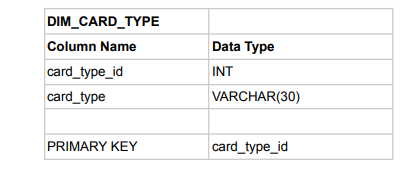

In [37]:
# creating a temporary df and selecting required columns
card = updated_schema_data.select('card_type').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
card1= card.select('card_type', row_number().over(Window.partitionBy().orderBy(card['card_type'])).alias("card_type_id"))
card1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|           card_type|card_type_id|
+--------------------+------------+
|              CIRRUS|           1|
|             Dankort|           2|
|     Dankort - on-us|           3|
|         HÃƒÂ¦vekort|           4|
| HÃƒÂ¦vekort - on-us|           5|
|             Maestro|           6|
|          MasterCard|           7|
|  Mastercard - on-us|           8|
|                VISA|           9|
|        Visa Dankort|          10|
|Visa Dankort - on-us|          11|
|            VisaPlus|          12|
+--------------------+------------+

In [39]:
#Check count for the Card Type Dimension
DIM_CARD_TYPE=card1.select('card_type_id','card_type')
DIM_CARD_TYPE.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

### Creating Table for Transactional Fact Table For  The Given Dataset

    -- This is the actual fact table for the data set which contains all of the numerical data such as the currency of the transaction, service, transaction amount, message code and text as well as weather info such as description, weather id etc.



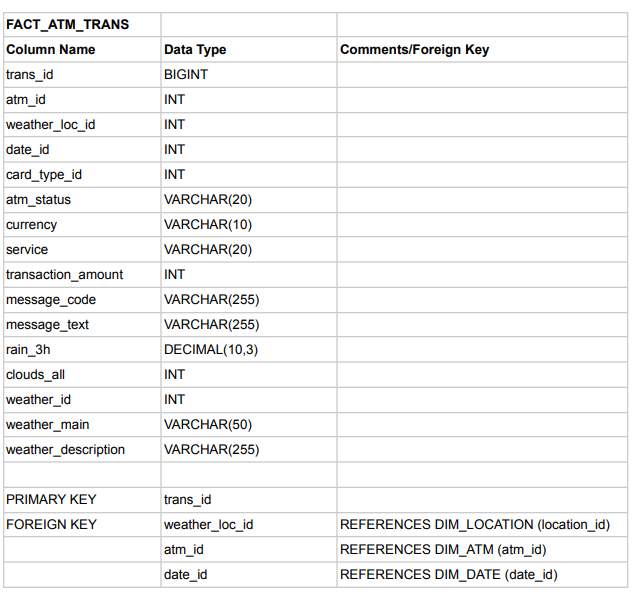

# First Stage:
        -- Joining the Original DataFrame with the Dim Location
        -- Getting the primary key of Dim Location i.e location_id
        -- location_id in Dim_Location is Weather_location_id in Fact Table
        -- Left Join is Preferred to get all the Data of DataFrame

In [40]:
# joining with DataFrame
fact_loc = updated_schema_data.join(DIM_LOCATION, on = ['atm_location','atm_streetname','atm_street_number','atm_zipcode','atm_lat','atm_lon'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
# Validating the count of the df at the end of Stage 1
fact_loc.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

# Second stage:
                -- Joining the First Stage DataFrame with the DIM ATM
                -- Getting the Primary key of Dim Atm i.e atm_id into Main DataFrame
                -- Left Join With Dim atm



In [43]:
#Changing the Column name atm_id Which is actually atm_number in Fact Table Schema
fact_loc = fact_loc.withColumnRenamed('atm_id', 'atm_number')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
# joining the dfs
fact_loc_atm = fact_loc.join(DIM_ATM, on = ['atm_number', 'atm_manufacturer', 'location_id'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
# Validating the count of the df at the end of Stage 2
fact_loc_atm.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

# Third stage:
            -- Joining the Second Stage DataFrame with the DIM Date
            -- Getting the Primary identifier i.e data_id
            -- left join with dim_date



In [48]:
fact_loc_atm_date = fact_loc_atm.join(DIM_DATE, on = ['year', 'month', 'day', 'hour', 'weekday'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
# Validating the count of the df at the end of Stage 3
fact_loc_atm_date.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

# Fourth stage:
              -- Joining the Second Stage DataFrame with the DIM Date
              -- Getting Primary key of Dim Card
              -- Left Join with DIM Card Type



In [50]:
fact_loc_atm_date_card = fact_loc_atm_date.join(DIM_CARD_TYPE, on = ['card_type'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
# Validating the count of the df at the end of Stage 4
fact_loc_atm_date_card.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

In [52]:
from pyspark.sql.window import Window

w = Window().orderBy('date_id')
FACT_ATM_TRANS = fact_loc_atm_date_card.withColumn("trans_id", row_number().over(w))
FACT_ATM_TRANS.show(5, True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+-------+---+----+-------+----------+----------------+-----------+------------+--------------+-----------------+-----------+-------+-------+----------+--------+------------------+----------+------------+------------+-----------+-----------+---------------+-----------------+------+--------+--------+----------+--------+-------+----------+----------+------------+--------------------+------+-------+-------------------+------------+--------+
|           card_type|year|  month|day|hour|weekday|atm_number|atm_manufacturer|location_id|atm_location|atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|atm_status|currency|transaction_amount|   service|message_code|message_text|weather_lat|weather_lon|weather_city_id|weather_city_name|  temp|pressure|humidity|wind_speed|wind_deg|rain_3h|clouds_all|weather_id|weather_main| weather_description|atm_id|date_id|     full_date_time|card_type_id|trans_id|
+--------------------+----+-------+---+----+-------+----------+---

In [53]:
# selecting and arranging only the required columns according to the target model
FACT_ATM_TRANS = FACT_ATM_TRANS.select('trans_id','atm_id','location_id','date_id','card_type_id','atm_status','currency', 'service', 'transaction_amount','message_code','message_text',
'rain_3h','clouds_all', 'weather_id', 'weather_main', 'weather_description')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
# checking that all required columns are present and named correctly
FACT_ATM_TRANS.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['trans_id', 'atm_id', 'location_id', 'date_id', 'card_type_id', 'atm_status', 'currency', 'service', 'transaction_amount', 'message_code', 'message_text', 'rain_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description']

In [55]:
# validating the count of the dataframe
FACT_ATM_TRANS.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

# Writing the PySpark Dataframes to AWS S3 Storage in csv format

In [56]:
# writing data from pyspark df 'dim_location' in csv format to dim_location
DIM_LOCATION.write.format('csv').option('header','false').save('s3://spark-etl-vivek/sparnord/dim_location/', mode='overwrite')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
# writing data from pyspark df 'dim_atm' in csv format to dim
DIM_ATM.write.format('csv').option('header','false').save('s3://spark-etl-vivek/sparnord/dim_atm/', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
# writing data from pyspark df 'dim_data' in csv format to dim_data folder in S3 bucket 'etlprojectbydheerajmishra'

DIM_DATE.write.format('csv').option('header','false').save('s3://spark-etl-vivek/sparnord/dim_date/', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
# writing data from pyspark df 'dim_card_type' in csv format to dim_card_type folder in S3 bucket 'etlprojectbydheerajmishra'
DIM_CARD_TYPE.write.format('csv').option('header','false').save('s3://spark-etl-vivek/sparnord/dim_card/', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [60]:
# writing data from pyspark df 'fact_atm_trans' in csv format to fact_atm_trans folder in S3 bucket 'etlprojectbydheerajmishra'
FACT_ATM_TRANS.write.format('csv').option('header','false').save('s3://spark-etl-vivek/sparnord/fact_table_atm/', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…